In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
#import pymc as pc
import itertools
import multiprocessing as mp  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm
from functools import partial
from staircase import staircase
from staircase import runSimu
from staircase import DCM

In [2]:
# parameters
sd_theta_list = [0.1, 0.2, 0.3]
temp_list = [0.2, 0.6, 1]
x_init_list = [100]
x_step_list = [5, 15, 25, 35]
n_subject_list = [100,200,500,1000]


df_params = pd.DataFrame(list(itertools.product(sd_theta_list, temp_list, x_init_list, x_step_list, n_subject_list)),
             columns = ['sd_theta','temp','x_init','x_step_up','n_subject'])

df_params['x_step_down'] = df_params['x_step_up']
df_params['mean_theta'] = 0.5


prop_reject_list = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params))),
                                total=len(df_params)):
        
        prop_reject_list.append(prop)



100%|██████████| 144/144 [26:08<00:00, 10.89s/it]


In [3]:
df_params['prop'] = [prop[1] for prop in prop_reject_list]

Text(0.5, 0, 'SD(theta)')

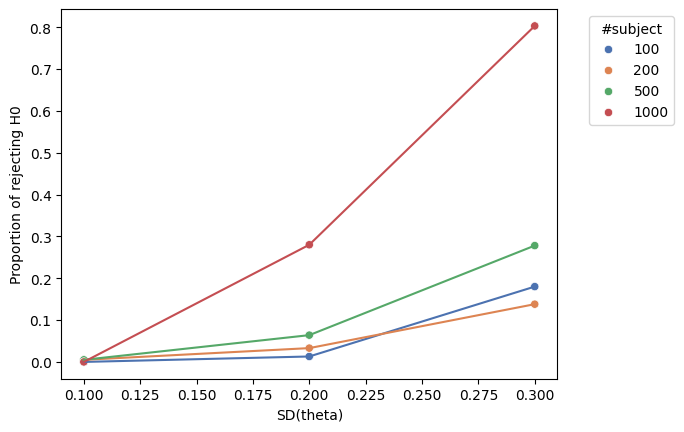

In [21]:
subset = df_params[(df_params['temp'] == 0.6) & \
                   (df_params['x_init'] == 100) & \
                   (df_params['x_step_up'] == 15)]


sns.scatterplot(data=subset, x='sd_theta', y='prop', hue='n_subject', palette='deep')
sns.lineplot(data=subset, x='sd_theta', y='prop', hue='n_subject', palette='deep', legend=False)
plt.legend(title='#subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion of rejecting H0')
plt.xlabel('SD(theta)')

Text(0.5, 0, 'lambda')

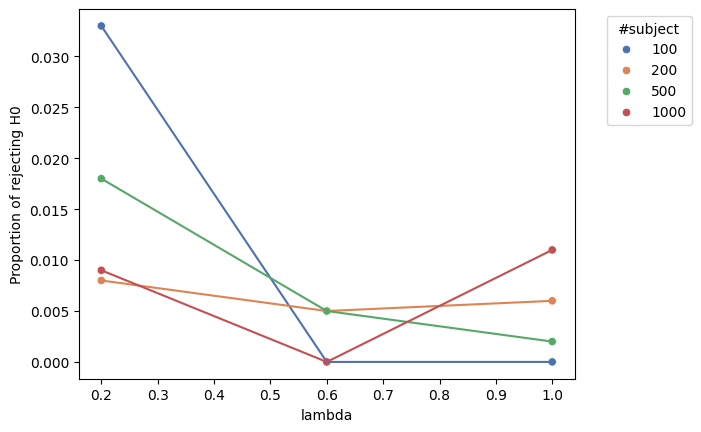

In [36]:
subset = df_params[(df_params['sd_theta'] == 0.1) & \
                   (df_params['x_init'] == 100) & \
                   (df_params['x_step_up'] == 15)]


sns.scatterplot(data=subset, x='temp', y='prop', hue='n_subject', palette='deep')
sns.lineplot(data=subset, x='temp', y='prop', hue='n_subject', palette='deep', legend=False)
plt.legend(title='#subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion of rejecting H0')
plt.xlabel('lambda')

Text(0.5, 0, 'step size')

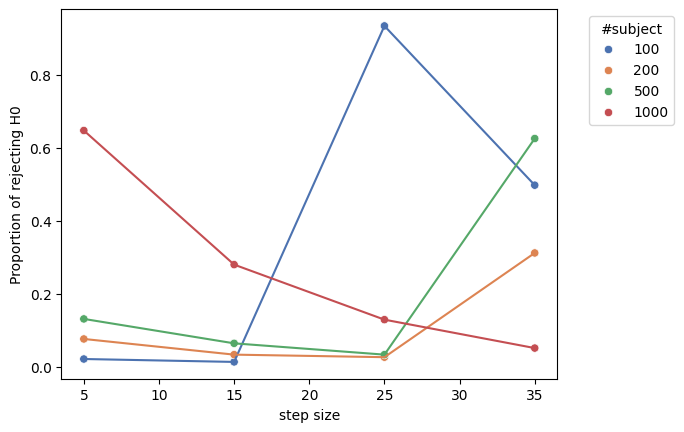

In [23]:
subset = df_params[(df_params['sd_theta'] == 0.2) & \
                   (df_params['temp'] == 0.6) & \
                   (df_params['x_init'] == 100)]


sns.scatterplot(data=subset, x='x_step_up', y='prop', hue='n_subject', palette='deep')
sns.lineplot(data=subset, x='x_step_up', y='prop', hue='n_subject', palette='deep', legend=False)
plt.legend(title='#subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion of rejecting H0')
plt.xlabel('step size')

In [24]:
x_init_list = [50, 100, 150, 200, 250]

df_params_2 = pd.DataFrame(list(itertools.product(x_init_list, n_subject_list)),
             columns = ['x_init','n_subject'])

df_params_2['x_step_down'] = 15 
df_params_2['x_step_up'] = 15
df_params_2['mean_theta'] = 0.5
df_params_2['sd_theta'] = 0.2
df_params_2['temp'] = 0.6


prop_reject_list_2 = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params_2)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params_2))),
                                total=len(df_params_2)):
        
        prop_reject_list_2.append(prop)

df_params_2['prop'] = [prop[1] for prop in prop_reject_list_2]

100%|██████████| 20/20 [04:16<00:00, 12.81s/it]


Text(0.5, 0, 'inital X_B')

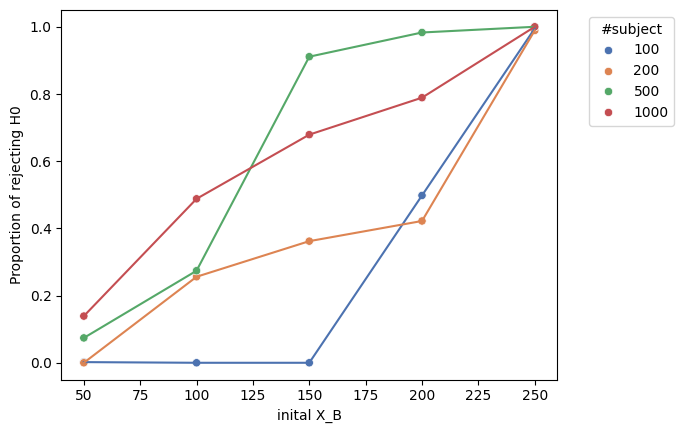

In [32]:
sns.scatterplot(data=df_params_2, x='x_init', y='prop', hue='n_subject', palette='deep')
sns.lineplot(data=df_params_2, x='x_init', y='prop', hue='n_subject', palette='deep', legend=False)
plt.legend(title='#subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion of rejecting H0')
plt.xlabel('inital X_B')

In [38]:
x_init_list_2 = [300, 500, 700, 900]

df_params_3 = pd.DataFrame(list(itertools.product(x_init_list_2, n_subject_list)),
             columns = ['x_init','n_subject'])

df_params_3['x_step_down'] = 15 
df_params_3['x_step_up'] = 15
df_params_3['mean_theta'] = 0.5
df_params_3['sd_theta'] = 0.2
df_params_3['temp'] = 0.6


prop_reject_list_3 = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params_3)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params_3))),
                                total=len(df_params_3)):
        
        prop_reject_list_3.append(prop)

df_params_3['prop'] = [prop[1] for prop in prop_reject_list_3]

100%|██████████| 16/16 [03:49<00:00, 14.37s/it]


Text(0.5, 0, 'inital X_B')

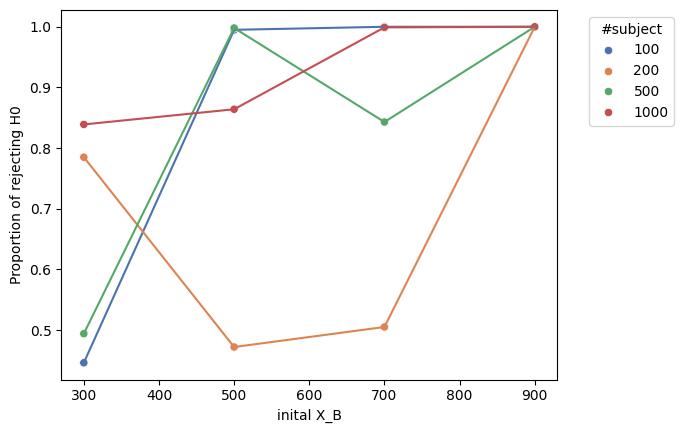

In [39]:
sns.scatterplot(data=df_params_3, x='x_init', y='prop', hue='n_subject', palette='deep')
sns.lineplot(data=df_params_3, x='x_init', y='prop', hue='n_subject', palette='deep', legend=False)
plt.legend(title='#subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Proportion of rejecting H0')
plt.xlabel('inital X_B')

In [9]:
func_params_2 = {'mean_theta':0.5,'sd_theta':0.05,'temp':0.5}
x_params_2 = {'x_init':50, 'x_step_up':15, 'x_step_down': 15}

simu_2 = staircase(func_params_2,x_params_2,n_subjects=1000)
simu_2.run()

In [10]:
simu_2.prop_reject_null

0.0

In [250]:
df_step = pd.read_csv('STEP/step_merged_choice.csv',index_col=0)

df_melted = pd.melt(df_step, id_vars=['cluster', 'hhn','idcode', 'country'], 
                    value_vars=['m6b_q01', 'm6b_q02', 'm6b_q03'],
                    var_name='q_risk', 
                    value_name='choice')

q_risk_cond = [
    df_melted['q_risk'] == 'm6b_q01',
    df_melted['q_risk'] == 'm6b_q02',
    df_melted['q_risk'] == 'm6b_q03'
]

x1_cond = [9, 12, 6]

# Generate the new column 'x1'
df_melted['x1'] = np.select(q_risk_cond, x1_cond)
df_melted['x2'] = 3

df_filtered = df_melted.loc[df_melted['choice'].isin([1, 2])]

dcm_risk = DCM(data=df_filtered,
                y='choice',x_1='x1',x_2='x2',q_cond='q_risk',
                init_params={'gamma':5.0,'temp':1.0},
                fixed_args={'delta':0.5})



In [251]:
dcm_risk.fit_param()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 48899.46422101056
        x: [ 1.121e+01  2.273e+00]
      nit: 11
      jac: [-1.455e-03  0.000e+00]
     nfev: 42
     njev: 14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [252]:
dcm_risk.fit_w()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 5997.801501127008
        x: [ 0.000e+00  0.000e+00]
      nit: 1
      jac: [ 1.844e+04  2.446e+04]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [2]:
df_psm = pd.read_stata('preference survey module/data/MainSample_Replication.dta')

# 1 - choosing lottery (A) - higher sure payoff
# 0 - choosing sure payoff (B) - lower sure payoff
# j: layer
# i: node

j_max = 4

for j in range(j_max+1):
    for i in range(2**(j_max-j)):

        col_name = 'layer_' + str(j_max-j+1) + '_q' +str(i+1)

        conditions = [
            df_psm['v_110'].between((2*i)*2**j+1, (2*i+1)*2**j),   
            df_psm['v_110'].between((2*i+1)*2**j+1, (2*i+2)*2**j) 
        ]

        choice_labels = [0, 1]

        new_col = np.select(conditions, choice_labels, default=np.nan)
        
        df_psm = pd.concat([df_psm, pd.DataFrame({col_name: new_col})], axis=1)


In [3]:
df_psm = df_psm.reset_index(names='pid')

q_columns = [col for col in df_psm.columns if 'layer_' in col]

df_melted = df_psm.melt(id_vars='pid', value_vars=q_columns, 
                        var_name='q_risk', value_name='choice').dropna()

def sure_pay(s):
    parts = s.strip().split('_')

    layer_number = j_max - int(parts[1]) + 1 
    q_number = int(parts[2][1:])

    return 2**(layer_number) + (q_number - 1)*2**(layer_number+1)

df_melted['x2'] = df_melted['q_risk'].apply(sure_pay)
df_melted['x1'] = 30
df_melted['layer'] = df_melted['q_risk'].apply(lambda x: x.strip().split('_')[1])


dcm_risk = DCM(data=df_melted.sort_values('layer'),
                y='choice',x_1='x1',x_2='x2',q_cond='layer',
                init_params={'gamma':5.0,'temp':1.0},
                fixed_args={'delta':0.5})

In [285]:
dcm_risk.fit_param()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1364.6496165125918
        x: [ 2.920e+00  1.197e+00]
      nit: 10
      jac: [-2.274e-05 -2.274e-05]
     nfev: 51
     njev: 17
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [286]:
dcm_risk.fit_w()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 273.309296242679
        x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
      nit: 1
      jac: [ 2.731e+02  2.729e+02  2.725e+02  2.727e+02]
     nfev: 15
     njev: 3
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [8]:
df_melted

,pid,q_risk,choice,x2,x1,layer
6,6,layer_5_q1,0.0,1,30,5
12,12,layer_5_q1,1.0,1,30,5
16,16,layer_5_q1,1.0,1,30,5
21,21,layer_5_q1,1.0,1,30,5
45,45,layer_5_q1,1.0,1,30,5
...,...,...,...,...,...,...
12674,404,layer_1_q1,0.0,16,30,1
12675,405,layer_1_q1,1.0,16,30,1
12676,406,layer_1_q1,0.0,16,30,1
12677,407,layer_1_q1,0.0,16,30,1


In [18]:
from biogeme import models
from biogeme.biogeme import BIOGEME
from biogeme.database import Database
from biogeme.expressions import Beta, MonteCarlo, bioDraws, log

In [38]:
# Load data into a Pandas DataFrame and create the Biogeme database
database = Database('db_psm', df_melted[['pid','choice','x2']])

# Define variables
x = database.variables['x2']
y = database.variables['choice']
pid = database.variables['pid']
c = 30

# Parameters for the joint distribution
mu_delta = Beta("mu_delta", 0, None, None, 0)
mu_beta = Beta("mu_beta", 0, None, None, 0)
sigma_delta = Beta("sigma_delta", 1, 0, None, 0)
sigma_beta = Beta("sigma_beta", 1, 0, None, 0)
rho = Beta("rho", 0, -1, 1, 0)

# Random variables for delta and beta, drawn per subject (pid)
delta = mu_delta + sigma_delta * bioDraws("v_delta", "NORMAL_ANTI")
beta = mu_beta + sigma_beta * (rho * bioDraws("v_delta", "NORMAL_ANTI") + 
                               (1 - rho**2)**0.5 * bioDraws("v_beta", "NORMAL_ANTI"))

# Utility function using subject-specific delta and beta
utility = delta * (0.5*c ** beta - x ** beta)

# Define the choice probability for observed choices
prob = MonteCarlo(models.logit(util={1: utility, 0: 0}, av=None, i=y))

logprob = log(prob)

# Create and estimate the Biogeme model
biogeme = BIOGEME(database, logprob)
biogeme.number_of_draws = 5000
biogeme.modelName = "subject_specific_mixed_logit"
results = biogeme.estimate()

# Display results
print(results.getEstimatedParameters())

                Value  Active bound  Rob. Std err  Rob. t-test  Rob. p-value
mu_beta      0.453175           0.0  3.232967e-02    14.017316      0.000000
mu_delta     0.537157           0.0  6.275238e-02     8.559941      0.000000
rho          0.253769           0.0  5.604409e-01     0.452803      0.650691
sigma_beta   0.000000           1.0  4.153244e-15     0.000000      1.000000
sigma_delta  0.002112           0.0  2.703770e-03     0.781202      0.434684


C:\Users\phd19zw1\AppData\Local\Temp\ipykernel_6056\1976121205.py:37: DeprecationWarning: getEstimatedParameters is deprecated; use get_estimated_parameters instead.
  print(results.getEstimatedParameters())


In [23]:
results.getGeneralStatistics()

C:\Users\phd19zw1\AppData\Local\Temp\ipykernel_6056\2891572999.py:1: DeprecationWarning: getGeneralStatistics is deprecated; use get_general_statistics instead.
  results.getGeneralStatistics()


{'Number of estimated parameters': GeneralStatistic(value=5, format=''),
 'Number of free parameters': GeneralStatistic(value=4, format=''),
 'Sample size': GeneralStatistic(value=1970, format=''),
 'Excluded observations': GeneralStatistic(value=0, format=''),
 'Init log likelihood': GeneralStatistic(value=-1299.5097774426818, format='.7g'),
 'Final log likelihood': GeneralStatistic(value=-1299.5097774426818, format='.7g'),
 'Likelihood ratio test for the init. model': GeneralStatistic(value=-0.0, format='.7g'),
 'Rho-square for the init. model': GeneralStatistic(value=np.float64(0.0), format='.3g'),
 'Rho-square-bar for the init. model': GeneralStatistic(value=np.float64(-0.003847604755879308), format='.3g'),
 'Akaike Information Criterion': GeneralStatistic(value=2609.0195548853635, format='.7g'),
 'Bayesian Information Criterion': GeneralStatistic(value=np.float64(2636.948498994024), format='.7g'),
 'Final gradient norm': GeneralStatistic(value=0.12460842580512509, format='.4E'),
 

In [29]:
estimated_values = dict(results.getEstimatedParameters()['Value'])

prob_chosen = models.logit(util={1: utility, 0: 0}, av=None, i=y)
beta_numerator = MonteCarlo(beta * prob_chosen)
delta_numerator = MonteCarlo(delta * prob_chosen)
denominator = MonteCarlo(prob_chosen)

simulate = {
    'betaNumerator': beta_numerator,
    'deltaNumerator': delta_numerator,
    'denominator': denominator,
    'choice': y,
}

biosim = BIOGEME(database, simulate)
sim = biosim.simulate(estimated_values)
sim['indiv_beta'] = sim['betaNumerator'] / sim['denominator']
sim['indiv_delta'] = sim['deltaNumerator'] / sim['denominator']

C:\Users\phd19zw1\AppData\Local\Temp\ipykernel_6056\2685841544.py:1: DeprecationWarning: getEstimatedParameters is deprecated; use get_estimated_parameters instead.
  estimated_values = dict(results.getEstimatedParameters()['Value'])


In [30]:
sim

,betaNumerator,deltaNumerator,denominator,choice,indiv_beta,indiv_delta
6,0.148633,0.176176,0.327982,0.0,0.453175,0.537152
12,0.304542,0.360980,0.672018,1.0,0.453175,0.537159
16,0.304542,0.360980,0.672018,1.0,0.453175,0.537158
21,0.304542,0.360980,0.672018,1.0,0.453175,0.537158
45,0.304542,0.360981,0.672018,1.0,0.453175,0.537159
...,...,...,...,...,...,...
12674,0.295953,0.350800,0.653065,0.0,0.453175,0.537159
12675,0.157222,0.186357,0.346935,1.0,0.453175,0.537154
12676,0.295953,0.350799,0.653065,0.0,0.453175,0.537158
12677,0.295953,0.350800,0.653065,0.0,0.453175,0.537158


In [33]:
# Pivot the data
df_wide = df_melted[['pid','x2','choice','layer']].pivot(index='pid', columns='layer', values=['x2', 'choice'])

df_wide.columns = [f"layer_{layer}_{col}" for col, layer in df_wide.columns]
df_wide = df_wide.reset_index()
df_wide

,pid,layer_1_x2,layer_2_x2,layer_3_x2,layer_4_x2,layer_5_x2,layer_1_choice,layer_2_choice,layer_3_choice,layer_4_choice,layer_5_choice
0,0,16.0,8.0,4.0,6.0,7.0,0.0,0.0,1.0,1.0,1.0
1,1,16.0,8.0,4.0,6.0,5.0,0.0,0.0,1.0,0.0,1.0
2,2,16.0,8.0,12.0,14.0,13.0,0.0,1.0,1.0,0.0,0.0
3,3,16.0,24.0,28.0,30.0,29.0,1.0,1.0,1.0,0.0,0.0
4,4,16.0,8.0,12.0,10.0,9.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
389,404,16.0,8.0,4.0,6.0,5.0,0.0,0.0,1.0,0.0,1.0
390,405,16.0,24.0,28.0,26.0,27.0,1.0,1.0,0.0,1.0,0.0
391,406,16.0,8.0,12.0,10.0,11.0,0.0,1.0,0.0,1.0,1.0
392,407,16.0,8.0,12.0,14.0,15.0,0.0,1.0,1.0,1.0,0.0


In [40]:
database = Database('db_psm', df_wide)

x = [database.variables[f'layer_{j}_x2'] for j in range(1,6)]
y = [database.variables[f'layer_{j}_choice'] for j in range(1,6)]
pid = database.variables['pid']
c = 30


utility = [delta * (0.5*c ** beta - x[i] ** beta) for j in range(1,6)]